**NECESSARY IMPORTS**

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr  # Measure of association
from scipy.stats import spearmanr # Robust correlation
from sklearn.linear_model import LinearRegression # Linear Regression
from sklearn.model_selection import train_test_split # Linear Regression
from sklearn.metrics import mean_squared_error, r2_score # Linear Regression
import statsmodels.api as sm # Robust regression, Multivariate regression
from sklearn.decomposition import PCA # Principle component analysis

**CREATING A DATASET WITH SYNTHETIC DATA**

In [31]:
# Generate synthetic data
np.random.seed(0)

# Number of data points
n = 100

# Software metrics columns
software_metrics = {
    'LinesOfCode': np.random.randint(100, 1000, n),
    'Complexity': np.random.randint(1, 10, n),
    'Bugs': np.random.randint(0, 5, n),
    'CodeReviewComments': np.random.randint(0, 20, n),
    'TestCoverage': np.random.uniform(0.5, 1.0, n),
}

# Creating a DataFrame
df = pd.DataFrame(software_metrics)

# Adding additional columns for demonstration
df['DeveloperExperience'] = np.random.randint(1, 10, n)
df['ReleaseVersion'] = np.random.randint(1, 5, n)
df['DevelopmentTime'] = np.random.randint(1, 100, n)

# Saving the dataset to a CSV file for use in Google Colab
df.to_csv('software_metrics_dataset.csv', index=True)

print("Software metrics dataset created and saved as 'software_metrics_dataset.csv'.")
print(df.head())


Software metrics dataset created and saved as 'software_metrics_dataset.csv'.
   LinesOfCode  Complexity  Bugs  CodeReviewComments  TestCoverage  \
0          784           5     3                   0      0.506974   
1          659           4     0                  11      0.766733   
2          729           8     4                   4      0.652291   
3          292           6     2                   0      0.941430   
4          935           6     3                  10      0.625311   

   DeveloperExperience  ReleaseVersion  DevelopmentTime  
0                    4               1               38  
1                    7               3               60  
2                    3               1               96  
3                    7               3               97  
4                    6               1               81  


### Box Plots

- **When to Use:**
  -  When datasets are not normally distributed, and the measurements are not  on a ratio scale.
  - Visualizing the distribution and central tendency of a single variable.
  - Comparing the distributions of multiple groups or categories.
  - Identifying outliers in the data.
  - Detecting skewness and spread of data.

- **Assumptions and Limitations:**
  - Box plots assume that the data is continuous or ordinal.
  - They are most informative when the data is approximately symmetric or has one peak.
  - Outliers may be displayed individually as points beyond the "whiskers."
  - The range covered by the whiskers may vary, and different software may use different methods for determining whisker length. This can lead to variability in interpretation.
  - They do not provide information about the underlying data distribution.


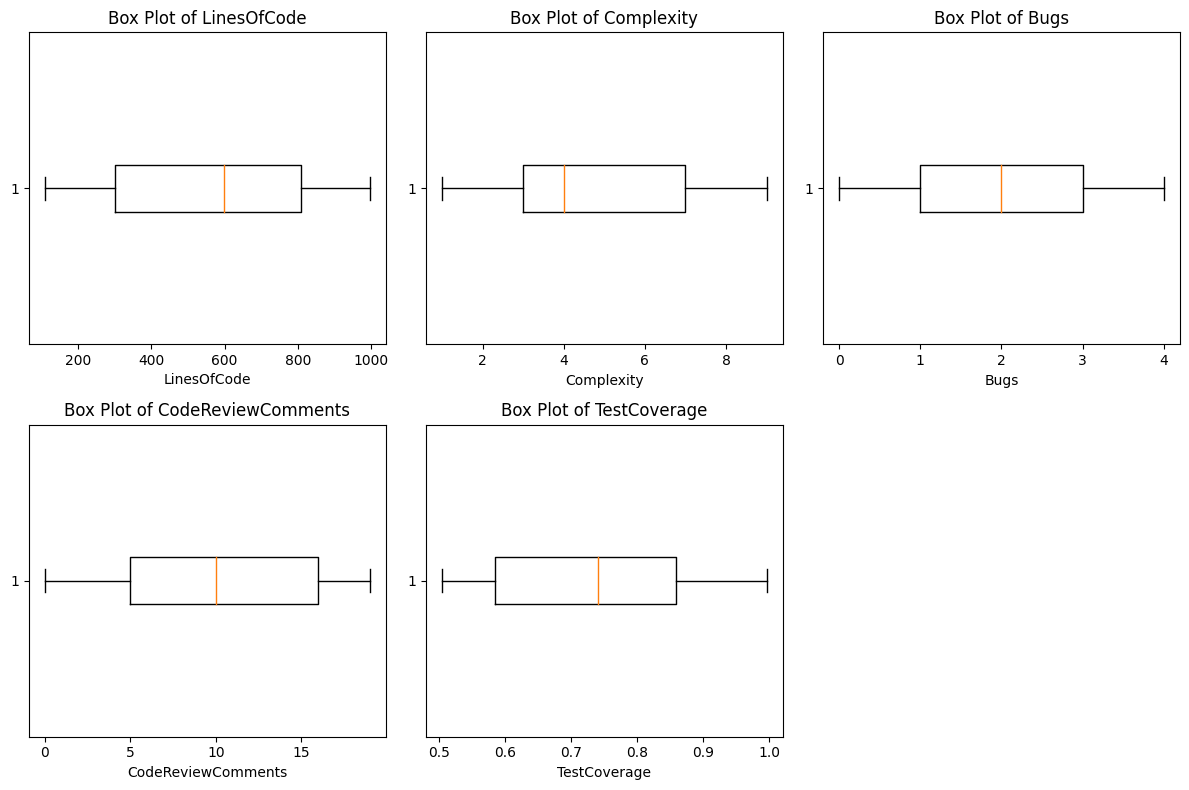

In [32]:
# Loading the software metrics dataset
data = pd.read_csv('software_metrics_dataset.csv')

# List of software metrics columns
software_metrics = ['LinesOfCode', 'Complexity', 'Bugs', 'CodeReviewComments', 'TestCoverage']

# Creating box plots for each metric
plt.figure(figsize=(12, 8))
for i, metric in enumerate(software_metrics, 1):
    plt.subplot(2, 3, i)
    plt.boxplot(data[metric], vert=False)
    plt.title(f'Box Plot of {metric}')
    plt.xlabel(metric)

plt.tight_layout()
plt.show()


### Bar Charts

- **When to Employ:**
  - To effectively visualize and compare the frequency or count of discrete or categorical data.
  - When it is necessary to portray the distribution of categorical data, allowing for easy understanding.

- **Assumptions and Limitations:**
  - Bar charts are particularly suitable for discrete or categorical data, making them less suitable for continuous data.
  - They are not designed to uncover or illustrate complex relationships between variables.
  - Complexity can arise when numerous categories are present.
  - Proper data organization is essential to facilitate the comprehension of the chart.


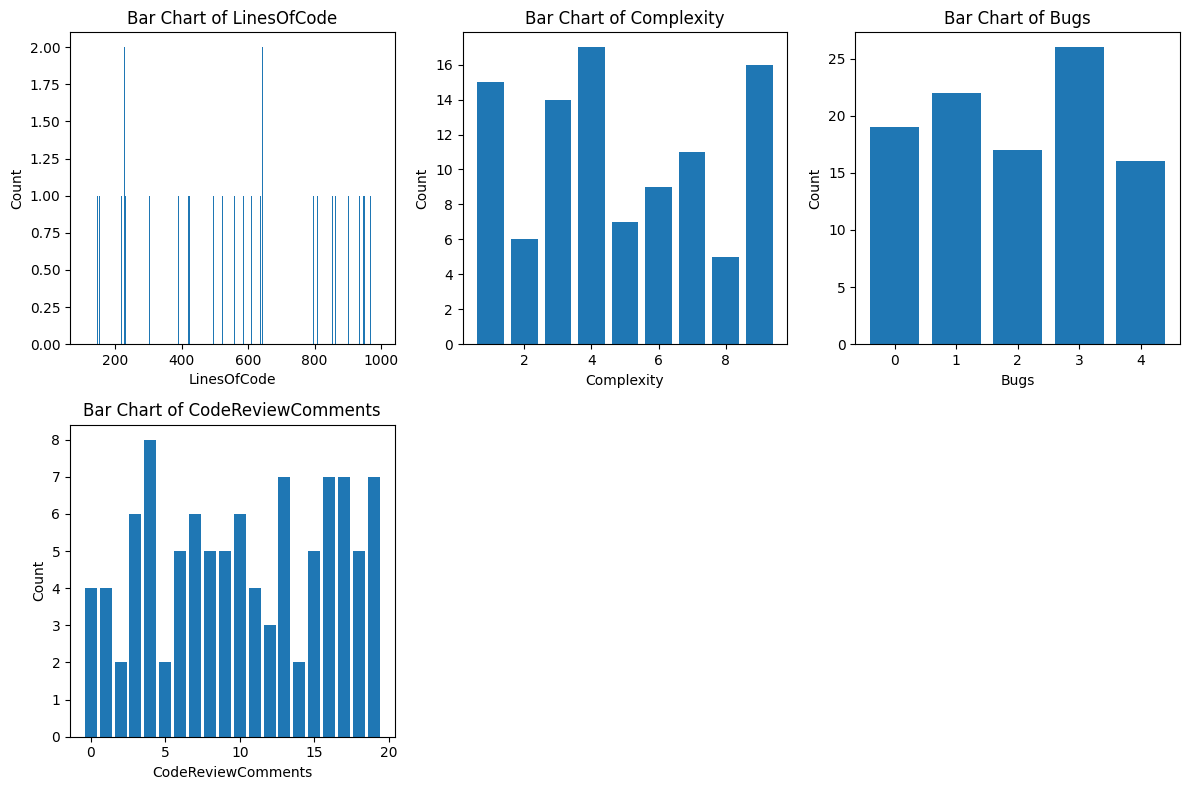

In [33]:
# Load the software metrics dataset
data = pd.read_csv('software_metrics_dataset.csv')

# List of software metrics columns
software_metrics = ['LinesOfCode', 'Complexity', 'Bugs', 'CodeReviewComments']

# Creating bar charts for the count of unique values in each metric
plt.figure(figsize=(12, 8))
for i, metric in enumerate(software_metrics, 1):
    plt.subplot(2, 3, i)
    value_counts = data[metric].value_counts().reset_index()
    value_counts.columns = [metric, 'Count']
    plt.bar(value_counts[metric], value_counts['Count'])
    plt.title(f'Bar Chart of {metric}')
    plt.xlabel(metric)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

### Control Charts

- **When to Employ:**
  - Monitoring the stability and consistency of a manufacturing or industrial process.
  - Identifying special causes of variation in a process.
  - Detecting deviations from a predetermined quality standard.
  - Assessing the need for process adjustments or intervention.

- **Assumptions and Limitations:**
  - Control charts assume that the data collected are measurements from a stable process with common causes of variation.
  - They may not be effective for identifying rare or infrequent events that fall outside the common cause variation.
  - The effectiveness of control charts depends on a sufficient sample size and regular data collection intervals.
  - Control charts are most suited for manufacturing and industrial processes and may not be as effective for non-manufacturing processes.



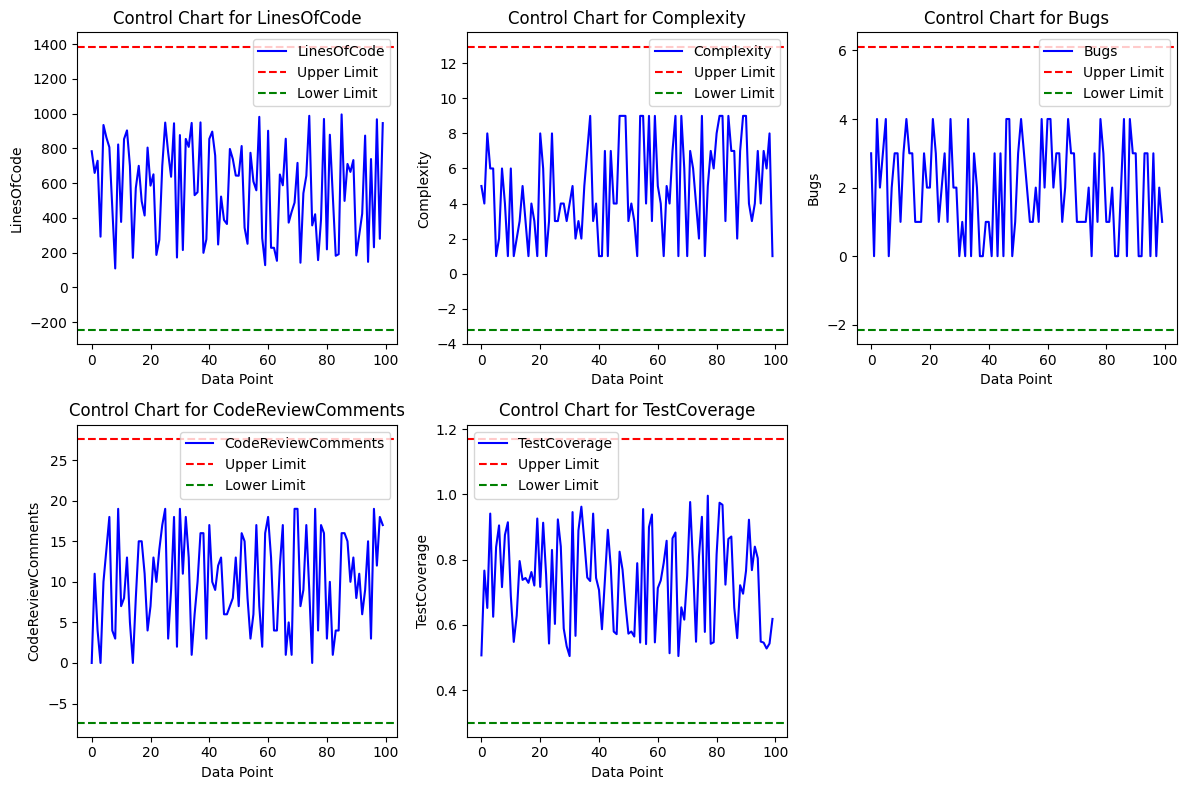

In [34]:
# Loading the software metrics dataset
data = pd.read_csv('software_metrics_dataset.csv')

# List of software metrics columns
software_metrics = ['LinesOfCode', 'Complexity', 'Bugs', 'CodeReviewComments', 'TestCoverage']

# Creating control charts for each metric
plt.figure(figsize=(12, 8))
for i, metric in enumerate(software_metrics, 1):
    plt.subplot(2, 3, i)

    # Computing the mean and standard deviation of the selected metric
    mean = data[metric].mean()
    std_dev = data[metric].std()

    # Creating control limits (I assumed, 3 standard deviations from the mean)
    upper_limit = mean + 3 * std_dev
    lower_limit = mean - 3 * std_dev

    # Creating the control chart
    plt.plot(data.index, data[metric], label=metric, color='b')
    plt.axhline(upper_limit, color='r', linestyle='--', label='Upper Limit')
    plt.axhline(lower_limit, color='g', linestyle='--', label='Lower Limit')
    plt.title(f'Control Chart for {metric}')
    plt.xlabel('Data Point')
    plt.ylabel(metric)
    plt.legend()

plt.tight_layout()
plt.show()


### Scatter Plots

- **When to Employ:**
  - Investigating the potential relationship between two continuous variables.
  - Visualizing the spread, dispersion, and patterns in data points.
  - Identifying trends, clusters, or outliers in the data.
  - Assessing the correlation or association between variables.

- **Assumptions and Limitations:**
  - Scatter plots are suitable for continuous data and are most informative when examining relationships between two continuous variables.
  - The effectiveness of a scatter plot in revealing trends or relationships depends on the underlying structure of the data; in cases of nonlinear relationships, other visualization techniques may be more appropriate.
  - The presence of outliers can affect the interpretation of the plot, and additional statistical analysis may be necessary to assess the strength and direction of associations accurately.
  - Scatter plots may not reveal causation, only correlation.



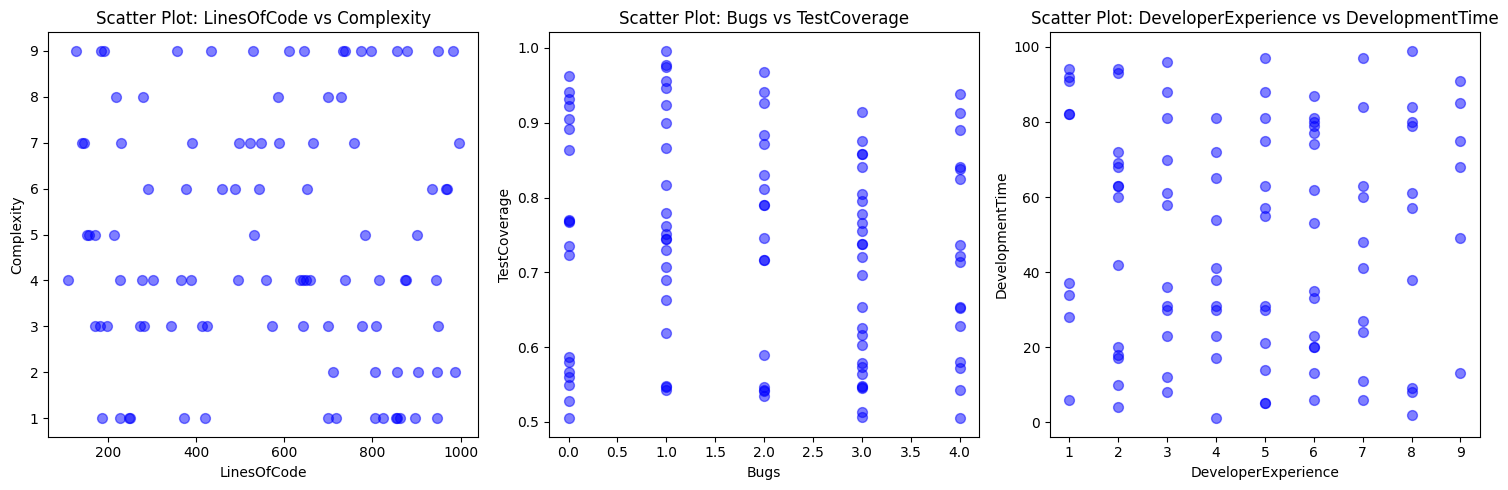

In [35]:
# Loading the software metrics dataset
data = pd.read_csv('software_metrics_dataset.csv')

# List of pairs for scatter plots
scatter_pairs = [('LinesOfCode', 'Complexity'), ('Bugs', 'TestCoverage'), ('DeveloperExperience', 'DevelopmentTime')]

# Creating scatter plots for each pair
plt.figure(figsize=(15, 5))
for i, (x_metric, y_metric) in enumerate(scatter_pairs, 1):
    plt.subplot(1, len(scatter_pairs), i)
    plt.scatter(data[x_metric], data[y_metric], s=50, c='b', alpha=0.5)
    plt.title(f'Scatter Plot: {x_metric} vs {y_metric}')
    plt.xlabel(x_metric)
    plt.ylabel(y_metric)
    plt.grid(False)

plt.tight_layout()
plt.show()

### Measures of Association

- **When to Employ:** Measures of association are valuable tools when:
  - Investigating the degree and nature of the relationship between two or more variables.
  - Assessing the strength, direction, and statistical significance of associations.
  - Comparing the influence of one variable on another.

- **Assumptions and Limitations:**
  - Measures of association are applicable to both continuous and categorical data, making them versatile for different types of variables.
  - The effectiveness of these measures depends on the underlying data distribution, linearity, and the absence of outliers.
  - Association does not imply causation. It is essential to consider other factors, confounding variables, and the possibility of spurious correlations.
  - Measures of association may not be suitable for inferring causality or directionality in relationships.



In [36]:
# Loading the software metrics dataset
data = pd.read_csv('software_metrics_dataset.csv')

# List of pairs for Pearson correlation
correlation_pairs = [('LinesOfCode', 'Complexity'), ('Bugs', 'TestCoverage'), ('CodeReviewComments', 'Bugs')]

# Calculating and printing the Pearson correlation for each pair
for variable1, variable2 in correlation_pairs:
    correlation, p_value = pearsonr(data[variable1], data[variable2])
    print(f"Pearson Correlation between {variable1} and {variable2}: {correlation:.2f}")



Pearson Correlation between LinesOfCode and Complexity: -0.06
Pearson Correlation between Bugs and TestCoverage: -0.14
Pearson Correlation between CodeReviewComments and Bugs: 0.05


### Robust Correlation

- **When to Employ:**
  - Analyzing the association between variables in the presence of outliers or data anomalies.
  - Seeking a correlation measure that is less sensitive to extreme data points.
  - Dealing with data that may not meet the assumptions of traditional correlation methods.

- **Assumptions and Limitations:**
  - Robust correlation techniques are designed to handle data with outliers or non-normally distributed data, making them suitable for real-world, noisy datasets.
  - They are especially useful when the data violates the assumptions of traditional correlation methods, such as Pearson's correlation, due to skewness or heavy-tailed distributions.
  - While robust correlation techniques are resilient to outliers, they may have reduced power for detecting true associations when outliers are absent.
  - Interpretation of robust correlation results may be less intuitive than traditional correlation measures.
  - Robust correlation does not imply causation and is solely a measure of association.


In [37]:
# Loading the software metrics dataset
data = pd.read_csv('software_metrics_dataset.csv')

# List of pairs for Spearman rank correlation
correlation_pairs = [('LinesOfCode', 'Complexity'), ('Bugs', 'TestCoverage'), ('CodeReviewComments', 'Bugs')]

# Calculating and printing the Spearman rank correlation for each pair
for variable1, variable2 in correlation_pairs:
    correlation, p_value = spearmanr(data[variable1], data[variable2])
    print(f"Spearman Rank Correlation between {variable1} and {variable2}: {correlation:.2f}")


Spearman Rank Correlation between LinesOfCode and Complexity: -0.08
Spearman Rank Correlation between Bugs and TestCoverage: -0.14
Spearman Rank Correlation between CodeReviewComments and Bugs: 0.05


### Linear Regression

- **When to Employ:**
  - Modeling the relationship between two continuous variables, where one serves as the dependent variable, and the other as the independent variable.
  - Seeking to predict or estimate values of the dependent variable based on the values of the independent variable.
  - Quantifying the strength and direction of the linear relationship between variables.
  - Understanding how changes in the independent variable impact the dependent variable.

- **Assumptions and Limitations:**
  - Linear regression assumes a linear relationship between the independent and dependent variables.
  - Linear regression may not be suitable when the relationship between variables is not truly linear, as nonlinear relationships require alternative modeling techniques.
  - Outliers and influential data points can disproportionately impact the results, potentially leading to biased parameter estimates.
  - Causation cannot be inferred from correlation; linear regression reveals associations, not causative relationships.



In [38]:
# Loading the software metrics dataset
data = pd.read_csv('software_metrics_dataset.csv')

# Selecting the variables for linear regression
independent_variable = 'DeveloperExperience'
dependent_variable = 'Bugs'

# Extracting the data for the selected variables
X = data[[independent_variable]].values
y = data[dependent_variable].values

# Spliting the data into training and testing sets (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Creating a linear regression model
reg = LinearRegression().fit(X_train, y_train)

# Making predictions on the test set
y_pred = reg.predict(X_test)

# Calculating the regression coefficients
slope = reg.coef_[0]
intercept = reg.intercept_

print(f"Linear Regression Equation: {dependent_variable} = {slope:.2f} * {independent_variable} + {intercept:.2f}")

# Comparing the predictions with the original values
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean squared error: ", mse)
print("R2 score: ", r2)

Linear Regression Equation: Bugs = 0.03 * DeveloperExperience + 1.83
Mean squared error:  2.0471931503719745
R2 score:  0.00014986550819306999


### Robust Regression

- **When to Employ:** Robust regression is a valuable technique that should be considered when:
  - Dealing with datasets containing outliers or influential data points that can disproportionately impact traditional regression models.
  - Seeking to build a regression model that is less sensitive to data anomalies and extreme observations.
  - Modeling relationships in the presence of non-normally distributed data.

- **Assumptions and Limitations:**
  - Robust regression techniques are designed to be less influenced by outliers and influential points, making them a robust choice for handling noisy datasets.
  - Robust regression methods may have limitations in situations where the relationship between variables is genuinely linear; in such cases, traditional regression may be more efficient.
  - Interpretation of robust regression results can be less straightforward than that of traditional regression.



In [39]:
# Loading the software metrics dataset
data = pd.read_csv('software_metrics_dataset.csv')

# Selecting the variables for robust regression
independent_variable = 'CodeReviewComments'
dependent_variable = 'Bugs'

# Adding a constant term to the independent variable (intercept)
X = sm.add_constant(data[independent_variable])
y = data[dependent_variable]

# Fitting a robust linear regression model
model = sm.RLM(y, X, M=sm.robust.norms.HuberT())

results = model.fit()

# Getting the summary of the robust regression
print(results.summary())

# Getting the estimated coefficients
intercept = results.params['const']
slope = results.params[independent_variable]

print("---------------------------")
print(f"Robust Regression Equation: {dependent_variable} = {slope:.2f} * {independent_variable} + {intercept:.2f}")


                    Robust linear Model Regression Results                    
Dep. Variable:                   Bugs   No. Observations:                  100
Model:                            RLM   Df Residuals:                       98
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Fri, 10 Nov 2023                                         
Time:                        11:22:27                                         
No. Iterations:                     7                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.8655      0

### Multivariate Regression

- **When to Employ:**
  - Analyzing relationships between a dependent variable and two or more independent variables.
  - Seeking to model and understand how multiple predictors collectively influence the dependent variable.
  - Evaluating complex systems where the outcome is influenced by several factors simultaneously.
  - Addressing situations where accounting for multiple variables is essential for accurate modeling.

- **Assumptions and Limitations:**
  - Multivariate regression assumes a linear relationship between the dependent variable and the set of independent variables.
  - It presupposes that the residuals (the differences between observed and predicted values) are normally distributed with constant variance.
  - The presence of multicollinearity (high correlation between independent variables) can lead to unstable parameter estimates.
  - Careful selection of independent variables is critical to avoid overfitting and improve model interpretability.
  - Multivariate regression provides associations and not causation; causal claims require additional evidence and experimental design.



In [40]:
# Loading the software metrics dataset
data = pd.read_csv('software_metrics_dataset.csv')

# Defined the independent variables
independent_variables = ['LinesOfCode', 'Complexity', 'CodeReviewComments']

# Adding a constant term to the independent variables (intercept)
X = sm.add_constant(data[independent_variables])

# Defined the dependent variable
y = data['Bugs']

# Fitting a multivariate regression model
model = sm.OLS(y, X).fit()

# Getting the summary of the multivariate regression
print(model.summary())

# Extracting the coefficients
intercept = model.params['const']
coefficients = model.params[independent_variables]

print("--------------------------------------------------------------------")

# Printing the multivariate regression equation
equation = f"Bugs = {intercept:.4f} {' + '.join([f'({coeff:.4f} * {var})' for coeff, var in zip(coefficients, independent_variables)])}"
print(f"Multivariate Regression Equation:\n{equation}")


                            OLS Regression Results                            
Dep. Variable:                   Bugs   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.028
Method:                 Least Squares   F-statistic:                    0.1124
Date:                Fri, 10 Nov 2023   Prob (F-statistic):              0.953
Time:                        11:22:27   Log-Likelihood:                -173.27
No. Observations:                 100   AIC:                             354.5
Df Residuals:                      96   BIC:                             365.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.8315      0

### Principal Component Analysis (PCA)

- **When to Employ:**
  - Dealing with high-dimensional data and aiming to reduce dimensionality while preserving essential information.
  - Exploring patterns and relationships among variables in a dataset.
  - Preprocessing data for subsequent analysis techniques or visualization.
  - Identifying underlying structures in data, particularly when the original features are correlated or redundant.

- **Assumptions and Limitations:**
  - PCA assumes that the data variables are linearly related, and the technique is sensitive to linear correlations.
  - It assumes that the data features are approximately normally distributed.
  - PCA does not reveal causal relationships between variables; it identifies patterns and associations.




Explained Variance of Principal Component 1: 0.31
Explained Variance of Principal Component 2: 0.21
Explained Variance of Principal Component 3: 0.19
Explained Variance of Principal Component 4: 0.16
Explained Variance of Principal Component 5: 0.13


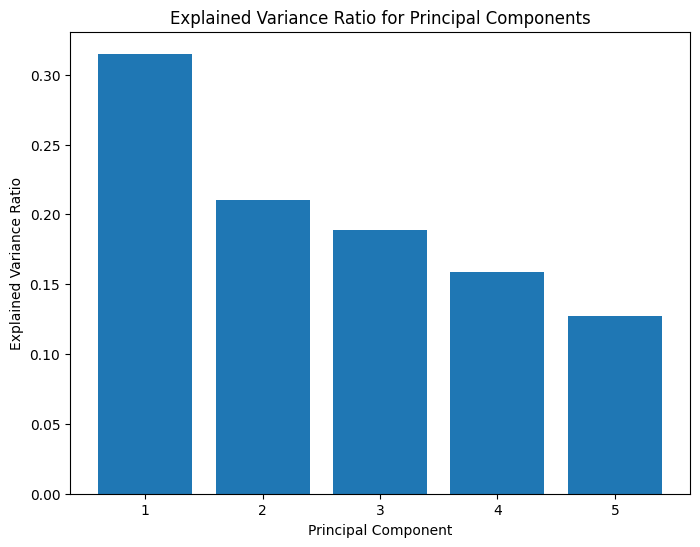

In [41]:
# Loading the software metrics dataset
data = pd.read_csv('software_metrics_dataset.csv')

# Selected variables for PCA
variables_for_pca = ['LinesOfCode', 'Complexity', 'Bugs', 'CodeReviewComments', 'TestCoverage']

# Standardized the data (mean = 0, variance = 1)
data_std = (data[variables_for_pca] - data[variables_for_pca].mean()) / data[variables_for_pca].std()

# Created a PCA model
pca = PCA()

# Fitting the PCA model to the standardized data
pca.fit(data_std)

# Getting the explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Printing the explained variance ratio for each principal component
for i, ev in enumerate(explained_variance):
    print(f"Explained Variance of Principal Component {i+1}: {ev:.2f}")

# Plot the explained variance ratio
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance)
plt.title('Explained Variance Ratio for Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()
